In [1]:
try:
  from ultralytics import YOLO
except:
  print(f'ultralytics is not installed. Installing now...')
  !pip install ultralytics
  from ultralytics import YOLO

ultralytics is not installed. Installing now...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 6.2 MB/s eta 0:00:00


In [2]:
# Load a Base YOLO Model
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 166MB/s]


In [3]:
import os
import zipfile
import shutil

from google.colab import files

from pathlib import Path

import  requests

In [4]:
# Load Valorant Data
uploaded = files.upload() ## select zipped file of images

Saving valorant-object-detection2.v4i.yolov8.zip to valorant-object-detection2.v4i.yolov8.zip


In [ ]:
data_path = Path("data/")
image_path = data_path / "valorant"

# If image folder does not exist, download it and prepare it...
if image_path.is_dir():
  print(f'{image_path} directory exists.')
else:
  print(f'Did not find {image_path} directory, creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

  # Download Valorant data
  # Handeled in above cell
  # uploaded = files.upload() # select zipped file of images

  # Move zipped file to data directory
  source_path = '/content/valorant-object-detection2.v4i.yolov8.zip' # for google colab, change if in different environment
  destination_path = data_path
  shutil.move(source_path, destination_path)

  # Unzip image folder
  with zipfile.ZipFile(data_path / 'valorant-object-detection2.v4i.yolov8.zip', 'r') as zip_ref:
    print('Unzipping valorant data...')
    zip_ref.extractall(image_path)

  # Remove .zip file
  os.remove(image_path / '/content/valorant-object-detection2.v4i.yolov8.zip')

In [8]:
print(image_path)
print(os.getcwd())

data/valorant
/content


In [11]:
# Train model
yaml_path = '/content/data/valorant/data.yaml'
results = model.train(data=yaml_path)

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/valorant/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 40.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/data/valorant/train/labels... 405 images, 35 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:00<00:00, 1850.87it/s]

train: New cache created: /content/data/valorant/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/valorant/valid/labels... 69 images, 4 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<00:00, 1287.15it/s]

val: New cache created: /content/data/valorant/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.37G       2.98      5.137      2.153          5        640: 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         69        133     0.0013      0.202     0.0026   0.000777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.38G      2.324      3.281      1.694         11        640: 100%|██████████| 26/26 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         69        133   0.000965       0.15   0.000619   0.000163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.38G       2.26      2.838      1.654          8        640: 100%|██████████| 26/26 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


                   all         69        133          1     0.0338      0.292     0.0908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      2.248      2.487      1.628         11        640: 100%|██████████| 26/26 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         69        133      0.481      0.267      0.272     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.39G      2.233       2.31      1.626         22        640: 100%|██████████| 26/26 [00:08<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         69        133        0.5      0.351      0.397      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.39G       2.23      2.081      1.527         12        640: 100%|██████████| 26/26 [00:07<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         69        133      0.599      0.444      0.534      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.38G      2.145      1.925      1.559         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         69        133      0.833      0.347      0.549      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.38G      2.128      1.899      1.603         22        640: 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         69        133      0.673      0.619      0.652      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.39G      2.098      1.741      1.575         18        640: 100%|██████████| 26/26 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         69        133      0.734      0.634      0.692      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.39G        2.1      1.561       1.52         19        640: 100%|██████████| 26/26 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         69        133      0.733      0.687      0.731      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.38G       2.13      1.617      1.568          9        640: 100%|██████████| 26/26 [00:09<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         69        133      0.561      0.669      0.612      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.39G       2.11       1.61      1.564         14        640: 100%|██████████| 26/26 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         69        133      0.697      0.592      0.638      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.38G      2.061      1.541      1.562          8        640: 100%|██████████| 26/26 [00:08<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         69        133      0.654      0.678      0.677      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.38G      2.032      1.463      1.518         10        640: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         69        133      0.805      0.665      0.704      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.38G      2.075      1.448      1.542         15        640: 100%|██████████| 26/26 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]


                   all         69        133       0.79      0.687      0.774      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.38G      2.036      1.386      1.514         15        640: 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         69        133      0.731      0.752      0.761      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G      2.028      1.408       1.52         14        640: 100%|██████████| 26/26 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         69        133      0.796      0.685       0.79      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.38G      2.012      1.347      1.523         18        640: 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         69        133      0.749       0.77      0.772       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.38G      1.937      1.337      1.493         23        640: 100%|██████████| 26/26 [00:08<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]


                   all         69        133      0.783      0.734      0.812      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.38G      2.016      1.351      1.517          5        640: 100%|██████████| 26/26 [00:06<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         69        133      0.819      0.774      0.821      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.38G      1.987      1.305      1.493         19        640: 100%|██████████| 26/26 [00:08<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         69        133      0.828      0.729      0.843       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.38G      1.985       1.29      1.472         16        640: 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         69        133      0.825      0.746      0.835      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.38G      1.873      1.212      1.449         12        640: 100%|██████████| 26/26 [00:06<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         69        133       0.87      0.782      0.854      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.38G      1.949      1.246      1.431          4        640: 100%|██████████| 26/26 [00:08<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         69        133      0.849      0.752      0.829      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.38G      1.918       1.24      1.476         14        640: 100%|██████████| 26/26 [00:07<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         69        133      0.774      0.794       0.84       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.38G      1.922      1.165      1.474         10        640: 100%|██████████| 26/26 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         69        133      0.814      0.793      0.845      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.38G      1.952       1.16      1.456         16        640: 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         69        133      0.898      0.737      0.843      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.38G      1.944       1.24      1.471          9        640: 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         69        133        0.8      0.807      0.815      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.39G      1.905      1.149      1.455         13        640: 100%|██████████| 26/26 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         69        133      0.832       0.78      0.848      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.38G      1.858      1.114      1.438          6        640: 100%|██████████| 26/26 [00:07<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         69        133      0.837      0.797       0.84      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.39G      1.862      1.092      1.436         12        640: 100%|██████████| 26/26 [00:06<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         69        133      0.919      0.748      0.855      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.38G      1.893      1.117       1.45         14        640: 100%|██████████| 26/26 [00:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         69        133      0.887      0.785      0.871      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.38G      1.878       1.12      1.458         17        640: 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         69        133       0.88      0.842      0.895      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.38G       1.88      1.132      1.459         15        640: 100%|██████████| 26/26 [00:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         69        133      0.834      0.766      0.833      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.38G      1.794      1.048      1.398          6        640: 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         69        133      0.864      0.781      0.855      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.38G      1.851      1.067      1.428         24        640: 100%|██████████| 26/26 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         69        133      0.883      0.743       0.85       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.38G      1.819       1.04      1.393         20        640: 100%|██████████| 26/26 [00:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         69        133      0.912      0.774      0.872      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.38G      1.861      1.089      1.484          9        640: 100%|██████████| 26/26 [00:06<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         69        133      0.848      0.775      0.834      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G      1.737     0.9934      1.362          7        640: 100%|██████████| 26/26 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         69        133      0.793      0.801      0.814      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.38G      1.818      1.091      1.418         14        640: 100%|██████████| 26/26 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         69        133      0.795      0.812      0.848      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.38G      1.716      1.002      1.367         19        640: 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         69        133      0.859      0.813      0.875      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G       1.73      1.001      1.354         16        640: 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         69        133      0.878      0.759      0.858      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G       1.75     0.9613      1.349         13        640: 100%|██████████| 26/26 [00:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         69        133      0.856      0.812      0.894      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.38G      1.778      1.017      1.394         22        640: 100%|██████████| 26/26 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         69        133      0.866      0.827      0.876       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.38G      1.733     0.9584      1.368         12        640: 100%|██████████| 26/26 [00:08<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         69        133      0.818      0.837      0.878       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G      1.688     0.9698      1.339          9        640: 100%|██████████| 26/26 [00:06<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         69        133      0.891      0.849      0.903      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.38G      1.694     0.9683      1.372         10        640: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         69        133      0.901      0.777      0.876      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.39G      1.727     0.9878      1.388         12        640: 100%|██████████| 26/26 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         69        133      0.891      0.876      0.903      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.38G      1.691     0.9251      1.343         19        640: 100%|██████████| 26/26 [00:06<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         69        133      0.891       0.83      0.868      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.38G       1.68     0.9109      1.352         14        640: 100%|██████████| 26/26 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         69        133      0.866      0.837      0.891      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.39G      1.674     0.9386      1.364          9        640: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         69        133      0.816      0.857      0.868      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.38G      1.694     0.9156      1.324          8        640: 100%|██████████| 26/26 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         69        133      0.872      0.829      0.885      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.39G      1.711     0.9363       1.37         12        640: 100%|██████████| 26/26 [00:09<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         69        133      0.856      0.787      0.857      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.38G      1.656     0.9532      1.301          4        640: 100%|██████████| 26/26 [00:06<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         69        133      0.806      0.844      0.868      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.38G      1.628     0.9183       1.34         11        640: 100%|██████████| 26/26 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         69        133      0.885      0.892      0.929      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.39G      1.635     0.8842      1.305         15        640: 100%|██████████| 26/26 [00:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         69        133      0.879       0.88      0.921      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.39G      1.579     0.8261      1.282         14        640: 100%|██████████| 26/26 [00:06<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         69        133      0.886      0.834      0.903      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.38G      1.615     0.8554      1.311         16        640: 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         69        133      0.884      0.767       0.85      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.38G      1.601     0.8753      1.282         11        640: 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         69        133      0.835      0.816      0.849      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.38G      1.587     0.8292      1.304         23        640: 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         69        133      0.877      0.854      0.882       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.38G      1.631     0.8726      1.286         17        640: 100%|██████████| 26/26 [00:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         69        133      0.807      0.797      0.871       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.38G      1.583     0.8191      1.247          9        640: 100%|██████████| 26/26 [00:06<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         69        133      0.896      0.819      0.864      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G      1.544     0.8178      1.263          8        640: 100%|██████████| 26/26 [00:08<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         69        133      0.868       0.83      0.875      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.38G      1.631     0.8668      1.314          6        640: 100%|██████████| 26/26 [00:08<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         69        133      0.852      0.856      0.899      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G       1.55     0.8271      1.254         17        640: 100%|██████████| 26/26 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         69        133      0.885      0.811      0.886      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.38G      1.521     0.8256      1.254         13        640: 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         69        133      0.865      0.842      0.899      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.39G      1.504     0.8324      1.267         13        640: 100%|██████████| 26/26 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         69        133      0.889      0.849       0.91      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.39G       1.55     0.8214       1.26         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         69        133      0.858      0.834      0.879      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.39G      1.521     0.7911      1.255         19        640: 100%|██████████| 26/26 [00:09<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         69        133       0.87      0.836       0.87      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.38G        1.5     0.7757      1.231         21        640: 100%|██████████| 26/26 [00:06<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         69        133      0.896      0.849      0.888      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G      1.464     0.7844      1.233          8        640: 100%|██████████| 26/26 [00:09<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         69        133      0.853      0.842      0.872      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.38G      1.513     0.7921      1.255         10        640: 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         69        133       0.87      0.833      0.872       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.38G      1.478      0.806      1.256         10        640: 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         69        133      0.856      0.872      0.873      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.38G       1.51     0.7808      1.253         10        640: 100%|██████████| 26/26 [00:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         69        133       0.83      0.826      0.873      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.38G      1.442     0.7732      1.238         12        640: 100%|██████████| 26/26 [00:06<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         69        133      0.817      0.799      0.846      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.38G      1.488     0.7712      1.242          9        640: 100%|██████████| 26/26 [00:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         69        133       0.85       0.84      0.877       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G      1.477     0.7807       1.23          4        640: 100%|██████████| 26/26 [00:08<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         69        133      0.834      0.842      0.872      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.38G      1.466     0.7437      1.173         12        640: 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         69        133      0.851      0.834      0.865      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.38G       1.45     0.7573      1.195          9        640: 100%|██████████| 26/26 [00:08<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         69        133      0.858      0.864      0.867      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.38G      1.392     0.7259       1.17         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         69        133      0.853      0.846      0.878      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.38G      1.399     0.7346      1.181         22        640: 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         69        133      0.849      0.867      0.882      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.38G      1.378     0.7213      1.179          5        640: 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         69        133      0.868      0.848      0.881      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.38G      1.406     0.7163      1.163         14        640: 100%|██████████| 26/26 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         69        133      0.878       0.84       0.89       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.38G      1.374     0.7042      1.153         13        640: 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         69        133      0.837      0.864      0.895      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G      1.391     0.7265      1.197          8        640: 100%|██████████| 26/26 [00:08<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         69        133       0.88      0.865        0.9      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.38G      1.411     0.7136      1.166          6        640: 100%|██████████| 26/26 [00:06<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         69        133       0.87      0.827      0.864      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.38G      1.326     0.7145      1.148         15        640: 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         69        133       0.83      0.847      0.855      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.39G       1.37     0.7021      1.145         13        640: 100%|██████████| 26/26 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         69        133      0.868      0.838      0.852      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.39G      1.293     0.6712       1.12         11        640: 100%|██████████| 26/26 [00:07<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         69        133      0.888      0.865      0.879      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.38G      1.351     0.6955      1.118         18        640: 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         69        133      0.872       0.85      0.879      0.329


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.38G      1.326     0.6723      1.163         10        640: 100%|██████████| 26/26 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         69        133      0.863      0.853       0.87      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.38G      1.308     0.6658      1.171         10        640: 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         69        133      0.866      0.853      0.877      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.38G      1.307     0.6459       1.15          8        640: 100%|██████████| 26/26 [00:09<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         69        133      0.882      0.866      0.899      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.38G      1.283     0.6437      1.126         10        640: 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         69        133      0.872      0.864      0.878      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.38G      1.263     0.6407       1.14          8        640: 100%|██████████| 26/26 [00:08<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         69        133      0.852      0.864      0.877       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.38G      1.288     0.6407      1.143          9        640: 100%|██████████| 26/26 [00:08<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         69        133       0.88      0.865      0.886      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.38G      1.241     0.6259      1.105         10        640: 100%|██████████| 26/26 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         69        133      0.895       0.88      0.903      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.38G      1.223     0.6046      1.115          8        640: 100%|██████████| 26/26 [00:08<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         69        133      0.858      0.857      0.874      0.326
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 48, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



98 epochs completed in 0.266 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


                   all         69        133      0.892      0.876      0.904      0.367
             enemyBody         69         67      0.908      0.896       0.91      0.372
             enemyHead         69         66      0.876      0.856      0.898      0.362
Speed: 0.4ms preprocess, 1.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train3


In [14]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)


val: Scanning /content/data/valorant/valid/labels.cache... 69 images, 4 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


                   all         69        133      0.891      0.876      0.904      0.365
             enemyBody         69         67      0.907      0.896       0.91      0.367
             enemyHead         69         66      0.876      0.857      0.897      0.363
Speed: 1.4ms preprocess, 6.4ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train34


In [ ]:
model.predict(source='/content/data/valorant/test/images' ,save=True, show_labels=False, show_conf=False)  # no arguments needed, dataset and settings remembered

In [20]:
import shutil

folder_path = "/content/runs/detect/train36"
output_filename = "/content/predictions/run36_preds"

shutil.make_archive(output_filename, 'zip', folder_path)

'/content/predictions/run36_preds.zip'

In [22]:
from google.colab import files

files.download('/content/predictions/run36_preds.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

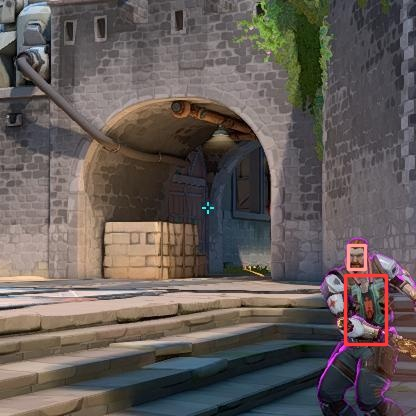

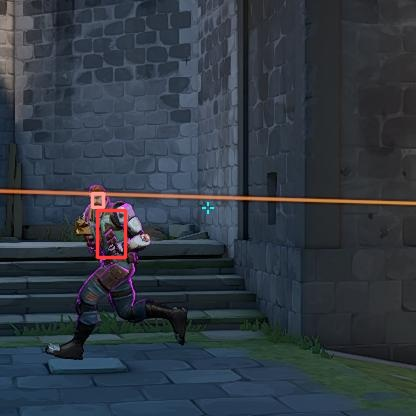

In [25]:
from IPython.display import Image, display
image_filename1 = '/content/runs/detect/train36/Valorant-Screenshot-2022-02-05-02-07-22-49_png.rf.6756dfeab0d26f2390c1b5ecd3dd32d4.jpg'
image_filename2 = '/content/runs/detect/train36/Valorant-Screenshot-2022-02-05-02-07-27-68_png.rf.6ea45e8146ee31d5081456954fc2620a.jpg'
display(Image(filename=image_filename1))
display(Image(filename=image_filename2))